In [2]:
import pandas as pd
import numpy as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

In [3]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

In [4]:
# import data
df = pd.read_csv('Players 5 Top Leagues (2022-2023).csv')

In [5]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tackles,...,Goals/Shot on target,Average Shot Distance,Shots from free kicks,Penalty Kicks Made,Penalty Kicks Attempted,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,1,Brenden Aaronson,us USA,MF/FW,Leeds United,eng Premier League,21,2000,26.4,45.0,...,0.11,18.4,2.0,0,0,3.9,3.9,0.09,-2.9,-2.9
1,2,Paxten Aaronson,us USA,MF/DF,Eint Frankfurt,de Bundesliga,18,2003,1.9,6.0,...,0.00,18.7,0.0,0,0,0.2,0.2,0.04,-0.2,-0.2
2,3,James Abankwah,ie IRL,DF,Udinese,it Serie A,18,2004,0.7,1.0,...,NaN,NaN,0.0,0,0,0.0,0.0,NaN,0.0,0.0
3,4,George Abbott,eng ENG,MF,Tottenham,eng Premier League,16,2005,0.0,0.0,...,NaN,NaN,0.0,0,0,0.0,0.0,NaN,0.0,0.0
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34,1987,37.0,82.0,...,0.33,15.0,0.0,0,0,2.4,2.4,0.07,-1.4,-1.4


In [6]:
# melakukan filter terkait posisi dan banyaknya waktu bermain
df = df.loc[((df['Pos']=='MF') | (df['Pos']=='MF/FW')) & (df['90s']>10)]

#cek dataframe
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tackles,...,Goals/Shot on target,Average Shot Distance,Shots from free kicks,Penalty Kicks Made,Penalty Kicks Attempted,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,1,Brenden Aaronson,us USA,MF/FW,Leeds United,eng Premier League,21,2000,26.4,45.0,...,0.11,18.4,2.0,0,0,3.9,3.9,0.09,-2.9,-2.9
5,6,Himad Abdelli,dz ALG,MF/FW,Angers,fr Ligue 1,22,1999,23.7,64.0,...,0.29,22.4,2.0,0,0,1.4,1.4,0.06,0.6,0.6
6,7,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,22,2000,32.2,46.0,...,0.25,19.1,0.0,0,0,0.9,0.9,0.07,0.1,0.1
7,8,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29,1993,26.0,92.0,...,0.00,24.0,0.0,0,0,0.5,0.5,0.04,-0.5,-0.5
20,21,Tyler Adams,us USA,MF,Leeds United,eng Premier League,23,1999,24.0,89.0,...,NaN,27.5,0.0,0,0,0.1,0.1,0.03,-0.1,-0.1


In [7]:
"""
       'Rk','Player','Nation','Pos','Squad','Comp','Age','Born','90s',
       
       # Defense
       'Tackles','Tackles Won','Tackles (Def 3rd)','Tackles (Mid 3rd)','Tackles (Att 3rd)', 
       'Dribblers Tackled','Dribbles Challenged','Percentage of dribblers tackled', 
       'Challenges Lost','Blocks','Shots Blocked','Passes Blocked','Interceptions',
       'Tkl+Int','Clearances', 'Errors',
       
       # Goal and Shot Creation
       'Shot-Creating Actions','Shot-Creating Actions/90',
       'SCA (PassLive)','SCA (PassDead)','SCA (Takes-On)','SCA (Shots)','SCA (Fouls drawn)',
       'SCA (Defensive actions)', 'Goal-Creating Actions','Goal-Creating Actions/90',
       'GCA (PassLive)','GCA (PassDead)','GCA (Takes-On)','GCA (Shots)','GCA (Fouls drawn)',
       'GCA (Defensif Action)',
       
       # Miscellaneous Stats
       'Yellow Cards','Red Cards','Second Yellow Card','Fouls','Fouls Drawn','Offsides',
       'Crosses','Interceptions.1','Tackles Won.1','Penalty Kicks Won','Penalty Kicks Conceded',
       'Own Goals','Ball Recoveries','Aerial Won','Aerials lost','Percentage of Aerials Won',
       
       # Passing
       'Att','Live-ball passes','Dead-ball passes','Passes from Free Kicks','Through Balls',
       'Switches','Crosses.1','Throw-Ins taken','Corner Kicks','Inswinging Corner Kicks',
       'Outswinging Corner Kicks','Straight Corner Kicks','Passes Completed','Passes Offside','Passes Blocked.1',
       'Passes Completed.1','Passes Attempted','Pass Completion Percentage','Total Passing Distance',
       'Progressive Passing Distance','Passes Completed (Short)','Passes Attempted (Short)',
       'Pass Completion Percentage (Short)','Passes Completed (Medium)','Passes Attempted (Medium)',
       'Pass Completion Percentage (Medium)','Passes Completed (Long)','Passes Attempted (Long)',
       'Pass Completion Percentage (Long)','Assists','xAG','xA','A-xAG','Key Passes',
       'Passes into Final Third','Passes into Penalty Area','Crosses into Penalty Area',
       'Progressive Passes',
       
       # Possesion
       'Touches','Touches (Def Pen)','Touches (Def 3rd)','Touches (Mid 3rd)',
       'Touches (Att 3rd)','Touches (Att Pen)','Touches (Live-Ball)','Take-Ons Attempted', 
       'Successful Take-Ons','Successful Take-On Percentage','Times Tackled During Take-On',
       'Tackled During Take-On Percentage','Carries','Total Carrying Distance',
       'Progressive Carrying Distance','Progressive Carries','Carries into Final Third',
       'Carries into Penalty Area','Miscontrols','Dispossessed','Passes Received',
       'Progressive Passes Rec',
       
       # Shooting
       'Goals','Shots Total','Shots on target','Shots on target Percentage',
       'Shots Total/90','Shots on target/90','Goals/Shot','Goals/Shot on target','Average Shot Distance', 
       'Shots from free kicks','Penalty Kicks Made','Penalty Kicks Attempted','xG','npxG','npxG/Sh', 
       'G-xG', 'np:G-xG'
"""

# Menghilangkan kolom yang tidak diperlukan dalam chart
df = df.drop(['Rk','Nation','Pos','Squad','Comp','Age','Born','Tackles',
       'Tackles Won','Tackles (Def 3rd)','Tackles (Mid 3rd)', 
       'Dribblers Tackled','Percentage of dribblers tackled', 
       'Challenges Lost','Blocks','Shots Blocked','Passes Blocked',
       'Tkl+Int','Clearances', 'Errors','Shot-Creating Actions','Shot-Creating Actions/90',
       'SCA (PassLive)','SCA (PassDead)','SCA (Takes-On)','SCA (Shots)','SCA (Fouls drawn)',
       'SCA (Defensive actions)', 'Goal-Creating Actions','Goal-Creating Actions/90',
       'GCA (PassLive)','GCA (PassDead)','GCA (Takes-On)','GCA (Shots)','GCA (Fouls drawn)',
       'GCA (Defensif Action)','Yellow Cards','Red Cards','Second Yellow Card','Fouls',
       'Fouls Drawn','Offsides','Crosses','Interceptions.1','Tackles Won.1',
       'Penalty Kicks Won','Penalty Kicks Conceded','Own Goals','Ball Recoveries',
       'Aerial Won','Aerials lost','Att','Live-ball passes',
       'Dead-ball passes','Passes from Free Kicks','Through Balls','Switches','Crosses.1',
       'Throw-Ins taken','Corner Kicks','Inswinging Corner Kicks','Outswinging Corner Kicks',
       'Straight Corner Kicks','Passes Completed','Passes Offside','Passes Blocked.1',
       'Passes Completed.1','Passes Attempted','Pass Completion Percentage','Total Passing Distance',
       'Progressive Passing Distance','Passes Completed (Short)','Passes Attempted (Short)',
       'Pass Completion Percentage (Short)','Passes Completed (Medium)','Passes Attempted (Medium)',
       'Pass Completion Percentage (Medium)','Passes Completed (Long)','Passes Attempted (Long)',
       'Pass Completion Percentage (Long)','Assists','xAG','xA','A-xAG','Key Passes',
       'Passes into Final Third','Passes into Penalty Area','Crosses into Penalty Area',
       'Touches','Touches (Def Pen)','Touches (Def 3rd)','Touches (Mid 3rd)',
       'Touches (Att 3rd)','Touches (Att Pen)','Touches (Live-Ball)', 
       'Successful Take-Ons','Successful Take-On Percentage','Times Tackled During Take-On',
       'Tackled During Take-On Percentage','Carries','Total Carrying Distance',
       'Progressive Carrying Distance','Carries into Final Third',
       'Carries into Penalty Area','Miscontrols','Dispossessed','Passes Received','Shots on target',
       'Shots Total/90','Shots on target/90','Goals/Shot','Goals/Shot on target','Average Shot Distance', 
       'Shots from free kicks','Penalty Kicks Made','Penalty Kicks Attempted','xG','npxG/Sh', 
       'G-xG', 'np:G-xG'],axis=1).reset_index()

In [8]:
# cek nama kolom pada dataframe
df.columns

Index(['index', 'Player', '90s', 'Tackles (Att 3rd)', 'Dribbles Challenged',
       'Interceptions', 'Percentage of Aerials Won', 'Progressive Passes',
       'Take-Ons Attempted', 'Progressive Carries', 'Progressive Passes Rec',
       'Goals', 'Shots Total', 'Shots on target Percentage', 'npxG'],
      dtype='object')

In [9]:
# cek dataframe
df.head()

,index,Player,90s,Tackles (Att 3rd),Dribbles Challenged,Interceptions,Percentage of Aerials Won,Progressive Passes,Take-Ons Attempted,Progressive Carries,Progressive Passes Rec,Goals,Shots Total,Shots on target Percentage,npxG
0,0,Brenden Aaronson,26.4,7.0,46.0,5,17.0,86.0,100.0,43.0,151.0,1,41,22.0,3.9
1,5,Himad Abdelli,23.7,10.0,67.0,28,43.9,151.0,76.0,58.0,111.0,2,24,29.2,1.4
2,6,Salis Abdul Samed,32.2,5.0,52.0,36,45.2,165.0,49.0,33.0,44.0,1,13,30.8,0.9
3,7,Laurent Abergel,26.0,3.0,92.0,34,34.8,143.0,41.0,13.0,14.0,0,13,15.4,0.5
4,20,Tyler Adams,24.0,10.0,77.0,35,62.5,136.0,22.0,19.0,20.0,0,4,0.0,0.1


In [10]:
# Membuat list parameter
params = list(df.columns)
params

['index',
 'Player',
 '90s',
 'Tackles (Att 3rd)',
 'Dribbles Challenged',
 'Interceptions',
 'Percentage of Aerials Won',
 'Progressive Passes',
 'Take-Ons Attempted',
 'Progressive Carries',
 'Progressive Passes Rec',
 'Goals',
 'Shots Total',
 'Shots on target Percentage',
 'npxG']

In [11]:
# menghilangkan beberapa kolom yang tidak digunakan sebagai parameter dalam pizza chart
params = params[3:]
params

['Tackles (Att 3rd)',
 'Dribbles Challenged',
 'Interceptions',
 'Percentage of Aerials Won',
 'Progressive Passes',
 'Take-Ons Attempted',
 'Progressive Carries',
 'Progressive Passes Rec',
 'Goals',
 'Shots Total',
 'Shots on target Percentage',
 'npxG']

In [12]:
# cek nama pemain
df.Player.values

array(['Brenden Aaronson', 'Himad Abdelli', 'Salis Abdul Samed',
       'Laurent Abergel', 'Tyler Adams', 'Lucien Agoume', 'Álvaro Aguado',
       'Kevin Agudelo', 'Naouirou Ahamada', 'Jean-Eudes Aholou',
       'Jean-Daniel Akpa-Akpro', 'Luis Alberto', 'Thiago Alcántara',
       'Carlos Alcaraz', 'Rubén Alcaraz', 'Iván Alejo', 'Carles Aleñá',
       'Ángel Algobia', 'Domingos André Ribeiro Almeida', 'Amath',
       'Nadiem Amiri', 'Sofyan Amrabat', 'Benjamin André',
       'Robert Andrich', 'Jaidon Anthony', 'Mauro Arambarri', 'Joe Aribo',
       'Stuart Armstrong', 'Maximilian Arnold', 'Tolgay Arslan',
       'Mathias Autret', 'Alex Baena', 'Nedim Bajrami',
       'Tommaso Baldanzi', 'Filippo Bandinelli', 'Antonín Barák',
       'Nicolò Barella', 'Ross Barkley', 'Leandro Barreiro Martins',
       'Mickaël Barreto', 'Christoph Baumgartner', 'Cyrille Bayala',
       'Youcef Belaïli', 'Haris Belkebla', 'Jean-Ricner Bellegarde',
       'Jude Bellingham', 'Fran Beltrán', 'Marco Benassi',


In [13]:
# menentukan pemain
player = df.loc[df['Player']=='Bruno Fernandes'].reset_index()
player = list(player.loc[0])
print(player)

[141, 899, 'Bruno Fernandes', 36.8, 19.0, 71.0, 25, 29.5, 263.0, 66.0, 89.0, 231.0, 8, 90, 35.6, 7.7]


In [14]:
# panjang array player harus sama dengan banyaknya parameter
print(len(player),print(len(params)))
player = player[4:]
print(len(player),print(len(params)))

12
16 None
12
12 None


In [15]:
# menghitung nilai persentil dengan scipy stats.
values = []
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

In [16]:
round(stats.percentileofscore(df[params[0]],player[0]))

99

In [17]:
for n,i in enumerate(values):
    if i == 100:
        values[n] = 99

In [18]:
values

[99, 89, 69, 16, 98, 81, 95, 98, 95, 99, 67, 97]

In [19]:
# menyesuaikan nama parameter agar tidak overlaping
params[3] = 'Percentage of\nAerials Won'
params[5] = 'Take-Ons\nAttempted'
params[7] = 'Progressive Passes\nReceived'
params[10] = 'Shots on\ntarget Percentage'
params[11] = 'Non-penalty xG'

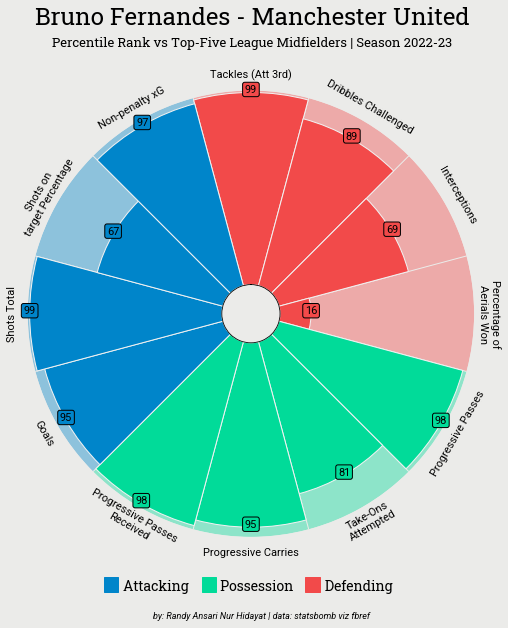

In [21]:
# warna untuk masing-masing potongan
slice_colors = ["#F24A4A"] * 4 + ["#01DB99"] * 4 + ["#0085CA"] * 4
text_colors = ["#000000"] * 12

# inisialisasi PyPizza class
baker = PyPizza(
    params=params,                  # list nama paremeter
    background_color="#EBEBE9",     # warna background
    straight_line_color="#EBEBE9",  # warna straight lines
    straight_line_lw=1,             # lebar garis straight lines
    last_circle_lw=0,               # lebar garis lingkaran terluar
    other_circle_lw=0,              # lebar garis lingkaran tengah
    inner_circle_size=15            # ukuran lingkaran dalam
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list nilai parameter
    figsize=(8, 8.5),                # menyesuaikan ukuran chart
    color_blank_space="same",        # menggunakan warna yang sama untuk blank space
    slice_colors=slice_colors,       # warna untuk masing-masing potongan
    value_colors=text_colors,        # warna value-text
    value_bck_colors=slice_colors,   # warna untuk blank spaces
    blank_alpha=0.4,                 # alpha untuk warna blank-space
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # nilai yang akan digunakan saat memplot potongan
    kwargs_params=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # label parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # nilai parameter pada kotak kecil di dalam pizza
)

# title
fig.text(
    0.515, 0.975, "Bruno Fernandes - Manchester United", size=24,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# subtitle
fig.text(
    0.515, 0.940,
    "Percentile Rank vs Top-Five League Midfielders | Season 2022-23",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# teks keterangan
fig.text(
    0.29, 0.05, "Attacking         Possession         Defending", size=14,
    fontproperties=font_bold.prop, color="#000000"
)

# kotak keterangan
fig.patches.extend([
    plt.Rectangle(
        (0.257, 0.048), 0.025, 0.025, fill=True, color="#0085CA",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.427, 0.048), 0.025, 0.025, fill=True, color="#01DB99",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.607, 0.048), 0.025, 0.025, fill=True, color="#F24A4A",
        transform=fig.transFigure, figure=fig
    ),
])

# credit
CREDIT = "by: Randy Ansari Nur Hidayat | data: statsbomb viz fbref"
fig.text(
    0.53, 0.004, f"{CREDIT}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="center"
)

plt.show()